# Logistic Regression 

## Import Dependencies

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from scipy.stats.mstats import winsorize
import warnings
warnings.filterwarnings("ignore")

In [65]:
# Load data
train_path = "Titanic_train.csv"
test_path = "Titanic_test.csv"
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [66]:
# Drop unimportant columns
drop_cols = ["Name", "Ticket", "Cabin"]
train_df.drop(columns=drop_cols, inplace=True)
test_df.drop(columns=drop_cols, inplace=True)

In [67]:
# Handle missing values using fillna
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
test_df["Age"].fillna(test_df["Age"].median(), inplace=True)

test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)
test_df["Embarked"].fillna(test_df["Embarked"].mode()[0], inplace=True)


In [68]:
# Encode categorical variables
encoder_sex = LabelEncoder()
encoder_embarked = LabelEncoder()

train_df["Sex"] = encoder_sex.fit_transform(train_df["Sex"])
test_df["Sex"] = encoder_sex.transform(test_df["Sex"])

train_df["Embarked"] = encoder_embarked.fit_transform(train_df["Embarked"])
test_df["Embarked"] = encoder_embarked.transform(test_df["Embarked"])

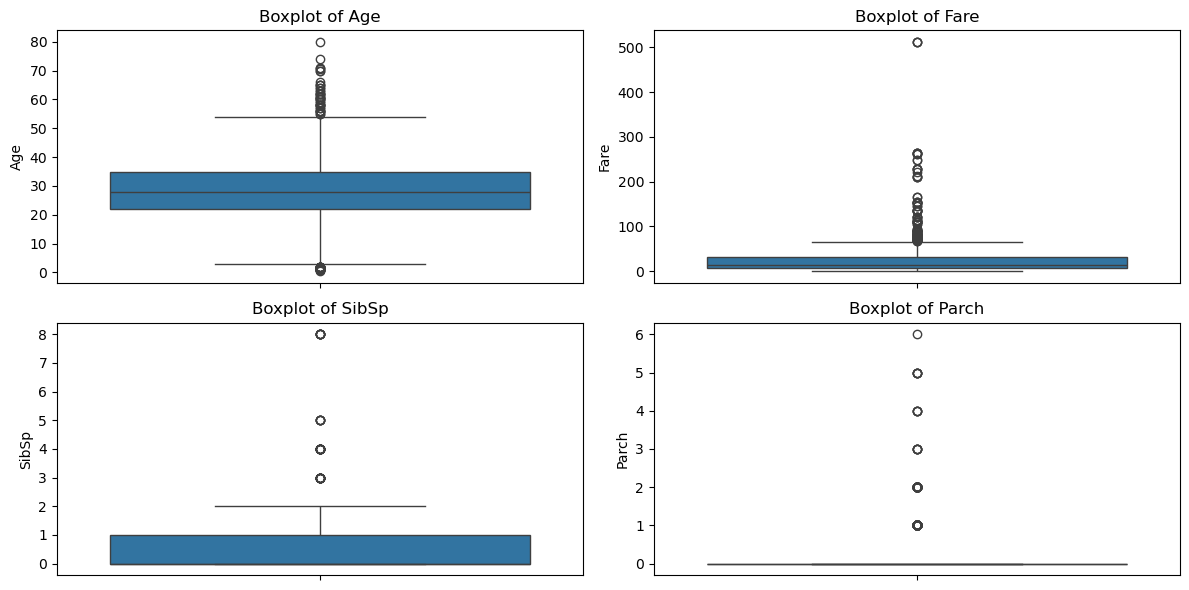

In [69]:
# Outlier detection using Box Plot
numeric_cols = ["Age", "Fare", "SibSp", "Parch"]
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=train_df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [70]:
# Outlier handling using Winsorization
def winsorize_outliers(df, column, limits=(0.05, 0.05)):
    df[column] = winsorize(df[column], limits=limits)

for col in numeric_cols:
    winsorize_outliers(train_df, col)

In [71]:
# Define features and target
X = train_df.drop(columns=["Survived", "PassengerId"])
y = train_df["Survived"]


In [72]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [73]:
# Train logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [74]:
# Save model using pickle
with open("logistic_regression_titanic.pkl", "wb") as file:
    pickle.dump(model, file)

In [75]:

# Model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Predictions
y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_prob)

# Display metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}\n")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))


Model Evaluation Metrics:
Accuracy: 0.7933
Precision: 0.7667
Recall: 0.6667
F1-score: 0.7132
ROC-AUC: 0.8498

Confusion Matrix:
[[96 14]
 [23 46]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.77      0.67      0.71        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



In [76]:

# Interpreting coefficients
coef = model.coef_.flatten()
features = X.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coef})
print("\nLogistic Regression Coefficients:")
print(coef_df.sort_values(by='Coefficient', ascending=False))



Logistic Regression Coefficients:
    Feature  Coefficient
5      Fare     0.005634
2       Age    -0.039176
4     Parch    -0.048640
6  Embarked    -0.227746
3     SibSp    -0.291010
0    Pclass    -0.989493
1       Sex    -2.557787
